## 從字庫裡面把字隨機挑出來組成二字詞或三字詞，然後強迫他們滿足exponential law，之後用這些詞組成文本

In [1]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
%matplotlib inline

In [2]:
class ExponentialGenerator: 
    """
    GaussianGenerator is an immutable type representing a Gaussian CDF
    with patameters sigma and n; centre located at 1.0   

    """

    
    def __init__(self, n, sigma): 
        """Ininitialize a Gaussian CDF.
         Paramerters
         n: int 
            n >= 0
         
         sigma: float 
            sigma >= 1
            
         mu: float
        """
        # Calculate non-normalized cumulative values from 1 to n: 
        assert n >= 0 and sigma >= 0.0
        assert int(n) == n 
        self.n = n
        self.sigma = sigma

        tmp = [math.exp(-(sigma * i)) for i in range(1, n+1)] 
        zeta = reduce(lambda sums, x: sums + [sums[-1] + x], tmp, [0]) 

        # Store the translation map: 
        # Abstract function: representing the cumulative distribution function 
        # of a Gaussian pmf 
        self.distMap = [x / zeta[-1] for x in zeta] 

    def next(self): 
        """Yield an integer between 0 and n, with probability governed by 
        Zipf distribution function specified by n and alpha.
        """
        # Take a uniform 0-1 pseudo-random value: 
        u = random.random()  

        # Translate the Zipf variable: 
        return bisect.bisect(self.distMap, u) - 1
    
    def __get_alpha(self):
        ans = self.alpha
        return ans
    
    def __get_n(self):
        ans = self.n
        return ans



In [3]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    gau_gen =  ExponentialGenerator(SAMPLE_WORD_NUM,ALPHA)
    f =  open("roc2.txt","r")

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    ###these codes are optional 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        num = gau_gen.next()
        w = small_world_list[num]
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

In [18]:
read_file_generate_fake(char_num = 2, out_file =  'exp_2word.txt', sample_word_num = 12000,
                            num_word_in_fake_scrip = 200000, 
                            alpha = 0.01, noun = False)

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------


In [19]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
filename = "exp_2word.txt" #change filename if you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


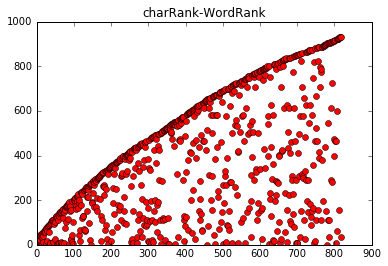

In [20]:
xx = big["0th_char_rank"]
plt.title('charRank-WordRank')
plt.plot(xx,'ro')

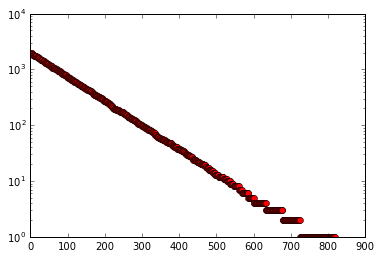

In [21]:
yy = word['wordFreq']
plt.yscale('log')
#plt.xscale('log')
plt.plot(yy,'ro')